In [23]:
import numpy as np
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [31]:
end = dt.datetime.now()
start = dt.datetime(end.year - 1,end.month,end.day)

df = yf.download('ITMG.JK', 
                       start, 
                       end,
                       progress=False,
                       auto_adjust=True)

In [35]:
df = df.reset_index()
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.tail()

,index,Date,Open,High,Low,Close,Volume
2020-10-21,2020-10-21,2020-10-21,8450.0,8450.0,8225.0,8225.0,1526400
2020-10-22,2020-10-22,2020-10-22,8250.0,8275.0,8050.0,8050.0,7631900
2020-10-23,2020-10-23,2020-10-23,8100.0,8150.0,8075.0,8075.0,944900
2020-10-26,2020-10-26,2020-10-26,8050.0,8200.0,8050.0,8125.0,2706700
2020-10-27,2020-10-27,2020-10-27,8125.0,8200.0,8050.0,8125.0,1842100


In [36]:
df['20_MA_Close'] = df['Close'].rolling(window=20).mean()
df['20_std_Close'] = df['Close'].rolling(window=20).std()

In [37]:
df['Upper'] = df['20_MA_Close'] + 2*df['20_std_Close']
df['Lower'] = df['20_MA_Close'] - 2*df['20_std_Close']

<AxesSubplot:>

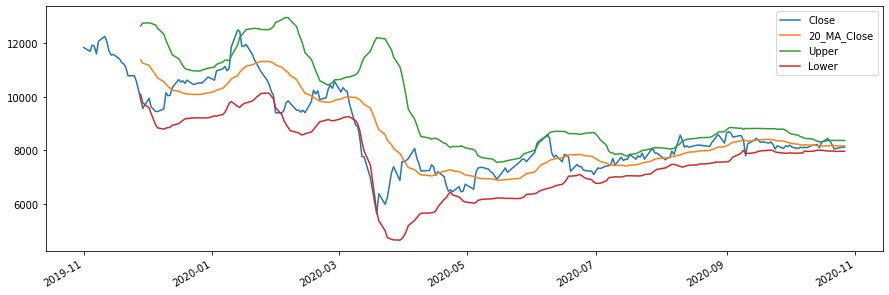

In [38]:
df[['Close','20_MA_Close','Upper','Lower']].plot(figsize=(15,5))

In [39]:
df.tail()

,index,Date,Open,High,Low,Close,Volume,20_MA_Close,20_std_Close,Upper,Lower
2020-10-21,2020-10-21,2020-10-21,8450.0,8450.0,8225.0,8225.0,1526400,8176.25,99.827153,8375.904307,7976.595693
2020-10-22,2020-10-22,2020-10-22,8250.0,8275.0,8050.0,8050.0,7631900,8176.25,99.827153,8375.904307,7976.595693
2020-10-23,2020-10-23,2020-10-23,8100.0,8150.0,8075.0,8075.0,944900,8171.25,102.365123,8375.980246,7966.519754
2020-10-26,2020-10-26,2020-10-26,8050.0,8200.0,8050.0,8125.0,2706700,8173.75,100.484026,8374.718052,7972.781948
2020-10-27,2020-10-27,2020-10-27,8125.0,8200.0,8050.0,8125.0,1842100,8171.25,101.071561,8373.393123,7969.106877


In [40]:
def buy_Sell(signal) :
    Buy = []
    Sell = []
    flag = -1

    
    for i in range(0, len(signal)):
        if signal['Close'][i] < signal['Lower'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)          
        elif signal['Close'][i] > signal['Upper'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)       
        else:
                Buy.append(np.nan)
                Sell.append(np.nan)  
                
                    
    return (Buy, Sell)

In [41]:
a=buy_Sell(df)
df['Buy_Signal_Price'] =a[0]
df['Sell_Signal_Price'] =a[1]

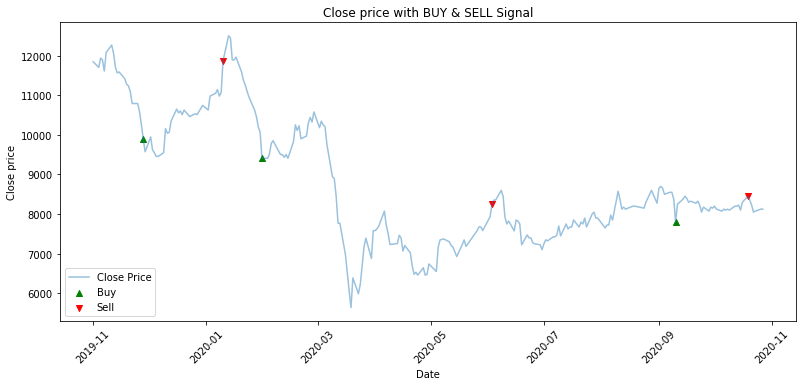

In [44]:
plt.figure(figsize=(13.2, 5.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha =1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha =1)
plt.plot(df['Close'], label='Close Price', alpha =0.45)
plt.title('Close price with BUY & SELL Signal')
plt.xticks(rotation =45)         
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(loc = 'lower left') 
plt.show()